Пример 1
----
Напишите функцию smart_hclust, которая получает на вход dataframe  с произвольным числом количественных переменных и число кластеров, которое необходимо выделить при помощи иерархической кластеризации.

Функция должна в исходный набор данных добавлять новую переменную фактор - cluster  -- номер кластера, к которому отнесено каждое из наблюдений.

Пример работы функции:

```r 
> test_data <- read.csv("https://stepic.org/media/attachments/course/524/test_data_hclust.csv")
> str(test_data)
'data.frame':  12 obs. of  5 variables:
 $ X1: int  11 9 9 9 7 9 16 23 15 19 ...
 $ X2: int  7 10 2 11 9 11 20 18 21 20 ...
 $ X3: int  10 10 12 8 10 9 22 21 14 15 ...
 $ X4: int  10 8 14 10 11 6 19 24 21 17 ...
 $ X5: int  8 6 11 3 14 9 16 16 21 17 ...

> smart_hclust(test_data, 3) # выделено три кластера
   X1 X2 X3 X4 X5 cluster
1  11  7 10 10  8       1
2   9 10 10  8  6       1
3   9  2 12 14 11       1
4   9 11  8 10  3       1
5   7  9 10 11 14       1
6   9 11  9  6  9       1
7  16 20 22 19 16       2
8  23 18 21 24 16       2
9  15 21 14 21 21       3
10 19 20 15 17 17       3
11 20 24 21 20 19       2
12 22 19 27 22 19       2
```
 
В этой и следующей задаче на кластерный анализ предполагается, что мы используем функцию hclust() для кластеризации данных с параметрами по умолчанию:

```r
hclust(d, method = "complete", members = NULL)
```
 
Для расчета матрицы расстояний предполагается, что используется функция dist() также с параметрами по умолчанию:

```r
dist(x, method = "euclidean", diag = FALSE, upper = FALSE, p = 2)
```

Для выделения желаемого числа кластеров по результатам иерархической кластеризации воспользуйтесь функцией cutree().

Иными словами, для кластеризации данных swiss на три кластера мы бы использовали команды:

```r
dist_matrix <- dist(swiss) # расчет матрицы расстояний
fit <- hclust(dist_matrix) # иерархическая кластеризация 
cluster <- cutree(fit, 3) # номер кластера для каждого наблюдения
````

In [23]:
smart_hclust <-  function(test_data, cluster_number){
    dist_matrix <- dist(test_data)
    fit <- hclust(dist_matrix)
    cluster <- cutree(fit, cluster_number)
    test_data['cluster'] <- as.factor(cluster)
    return(test_data)
}

In [27]:
test_data <- read.csv("https://stepic.org/media/attachments/course/524/test_data_hclust.csv")
a <- smart_hclust(test_data, 3)

In [28]:
str(a)

'data.frame':	12 obs. of  6 variables:
 $ X1     : int  11 9 9 9 7 9 16 23 15 19 ...
 $ X2     : int  7 10 2 11 9 11 20 18 21 20 ...
 $ X3     : int  10 10 12 8 10 9 22 21 14 15 ...
 $ X4     : int  10 8 14 10 11 6 19 24 21 17 ...
 $ X5     : int  8 6 11 3 14 9 16 16 21 17 ...
 $ cluster: Factor w/ 3 levels "1","2","3": 1 1 1 1 1 1 2 2 3 3 ...


In [ ]:
# решение степика 
smart_hclust <- function(test_data, n_cluster){    
    d <- dist(test_data)    
    fit <- hclust(d)    
    test_data$cluster <- factor(cutree(fit, k = n_cluster))    
    return(test_data)    
}

In [61]:
smart_hclust<-  function(test_data, cluster_number){
    library("dplyr")
    cluster <- test_data %>%
        dist() %>%
        hclust() %>%
        cutree(cluster_number) %>%
        as.factor()
    
  test_data$cluster <- cluster  
  return(test_data)
}

In [62]:
test_data <- read.csv("https://stepic.org/media/attachments/course/524/test_data_hclust.csv")
a <- smart_hclust(test_data, 3)
a

X1,X2,X3,X4,X5,cluster
11,7,10,10,8,1
9,10,10,8,6,1
9,2,12,14,11,1
9,11,8,10,3,1
7,9,10,11,14,1
9,11,9,6,9,1
16,20,22,19,16,2
23,18,21,24,16,2
15,21,14,21,21,3
19,20,15,17,17,3


Пример 2
----
Интересной особенностью кластерного анализа является тот факт, что мы получаем только итоговый ответ, к какому кластеру принадлежит каждое наблюдение. Однако мы не знаем, по каким переменным различаются выделенные кластеры. Поэтому, если нас интересует не только сам факт того, что мы смогли выделить кластеры в наших данных, но мы также хотим понять, чем же они различаются, разумно сравнить кластеры между собой по имеющимся переменным.

Напишите функцию get_difference, которая получает на вход два аргумента: 

- test_data — набор данных с произвольным числом количественных переменных.
- n_cluster — число кластеров, которое нужно выделить в данных при помощи иерархической кластеризации.

Функция должна вернуть названия переменных, по которым были обнаружен значимые различия между выделенными кластерами (p < 0.05)﻿. Иными словами, после того, как мы выделили заданное число кластеров, мы добавляем в исходные данные новую группирующую переменную — номер кластера, и сравниваем получившиеся группы между собой по количественным переменным при помощи дисперсионного анализа.

Пример работы функции:

В первом наборе данных, очевидно, что два кластера будут значимо различаться только по переменной V2.

```r
> test_data <- read.csv("https://stepic.org/media/attachments/course/524/cluster_1.csv")
> get_difference﻿(test_data, 2)
[1] "V2" 
```

Во втором наборе данных при выделении двух кластеров значимые различия получаются по обеим переменным.

```r
> test_data <- read.csv("https://stepic.org/media/attachments/course/524/cluster_2.csv")
> get_difference﻿(test_data, 2)
[1] "V1" "V2"
```

Подсказки:

1. Не забудьте перевести переменную с номером кластера в фактор! 
2. Вы можете использовать вашу функцию из предыдущего задания.
3. Для поиска различий используйте ANOVA (функция aov). Давайте договоримся, что для наших целей мы не будем проверять данные на соответствие требованиями к применению этого критерия и не будем думать о поправке на множественные сравнения.

In [76]:
get_difference <-  function(test_data, n_cluster){
    dist_matrix <- dist(test_data) 
    fit <- hclust(dist_matrix) 
    new_data <- test_data
    new_data$cluster <- factor(cutree(fit, n_cluster))
    p_val <- sapply(test_data, function(x) summary(aov(x ~ cluster, new_data))[[1]][["Pr(>F)"]][[1]])
    names(test_data[p_val < 0.05])
}

test_data <- read.csv("https://stepic.org/media/attachments/course/524/cluster_1.csv")
a <- get_difference(test_data, 2)

In [ ]:
get_difference <- function(test_data, n_cluster){    
    dist_matrix <- dist(test_data)    
    fit <- hclust(dist_matrix)    
    test_data$cluster <- as.factor(cutree(fit, n_cluster))    
    p_val <- sapply(test_data[,-ncol(test_data)],    
        function(x) {summary(aov(x~cluster, test_data))[[1]][1,'Pr(>F)']})    
    return(names(p_val)[p_val < 0.05])    
}

In [ ]:
get_difference <- function(df, n_clusters){
    fit <- hclust(dist(df))
    cluster <- factor(cutree(fit, n_clusters))
    is.good <- sapply(df, function(x) anova(aov(x ~ cluster))$P[1] < 0.05)
    names(df)[is.good]
}

Пример 3
---
Напишите функцию get_pc, которая получает на вход dataframe с произвольным числом количественных переменных. Функция должна выполнять анализ главных компонент и добавлять в исходные данные две новые колонки со значениями первой и второй главной компоненты. Новые переменные должны называться "PC1"  и "PC2" соответственно.

Пример работы функции:
```r
> test_data <- read.csv("https://stepic.org/media/attachments/course/524/pca_test.csv")

> test_data
  V1 V2 V3 V4 V5
1 13 15 12 13 12
2 16 11  8 12  6
3 15  7 10 12 13
4 12 11  6  6  4
5 11 13 13 10 12

> get_pc(test_data)
  V1 V2 V3 V4 V5  PC1  PC2
1 13 15 12 13 12 -4.5  2.4
2 16 11  8 12  6  3.0 -1.9
3 15  7 10 12 13 -2.8 -5.1
4 12 11  6  6  4  7.8  1.7
5 11 13 13 10 12 -3.6  3.0﻿
```
 

Для выполнения анализа главных компонент используйте функцию ﻿prcomp(). Изучите результат применения этой функции к данным, чтобы найти, где хранятся значения выделенных главных компонент.


In [98]:
test_data <- read.csv("https://stepic.org/media/attachments/course/524/pca_test.csv")
fit <- prcomp(test_data)
str(fit)

List of 5
 $ sdev    : num [1:5] 5.28 3.42 2.45 5.63e-01 9.30e-16
 $ rotation: num [1:5, 1:5] 0.0271 -0.1276 -0.5133 -0.3967 -0.7497 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:5] "V1" "V2" "V3" "V4" ...
  .. ..$ : chr [1:5] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:5] 13.4 11.4 9.8 10.6 9.4
  ..- attr(*, "names")= chr [1:5] "V1" "V2" "V3" "V4" ...
 $ scale   : logi FALSE
 $ x       : num [1:5, 1:5] -4.5 3.04 -2.75 7.84 -3.62 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:5] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


In [99]:
fit$x

PC1,PC2,PC3,PC4,PC5
-4.500822,2.364595,2.054657,-0.6400616,1.115373e-15
3.039182,-1.929687,3.234643,0.5067212,1.004351e-15
-2.752467,-5.076265,-1.868558,-0.2096502,1.004351e-15
7.837194,1.688535,-1.581097,-0.3276701,-2.168944e-16
-3.623088,2.952822,-1.839644,0.6706607,1.004351e-15


In [96]:
get_pc <- function(d){
    x_num <- prcomp(test_data)$x
    d$PC1 <- round(x_num[, "PC1"], dig=1)
    d$PC2 <- round(x_num[, "PC2"], dig=1)
    return(d)
}

In [97]:
test_data <- read.csv("https://stepic.org/media/attachments/course/524/pca_test.csv")
get_pc(test_data)

V1,V2,V3,V4,V5,PC1,PC2
13,15,12,13,12,-4.5,2.4
16,11,8,12,6,3.0,-1.9
15,7,10,12,13,-2.8,-5.1
12,11,6,6,4,7.8,1.7
11,13,13,10,12,-3.6,3.0


In [ ]:
# решение степика 
get_pc <- function(test){    
    fit <- prcomp(test)    
    test<- cbind(test, fit$x[,1:2])    
    return(test)    
}

Пример 4
----
Усложним предыдущую задачу! Напишите функцию get_pca2, которая принимает на вход dataframe с произвольным числом количественных переменных. Функция должна рассчитать, какое минимальное число главных компонент объясняет больше 90% изменчивости в исходных данных и добавлять значения этих компонент в исходный dataframe в виде новых переменных.

Рассмотрим работу функции на примере встроенных данных swiss:

```r
# посмотрим сколько главных компонент объясняют больше 90% изменчивости в данных
> fit <- prcomp(swiss)
> summary(fit)
Importance of components:
                          PC1     PC2      PC3     PC4     PC5    PC6
Standard deviation     43.836 21.6022 12.05342 4.75916 3.65754 2.4882
Proportion of Variance  0.746  0.1812  0.05641 0.00879 0.00519 0.0024
Cumulative Proportion   0.746  0.9272  0.98361 0.99240 0.99760 1.0000

# в нашем случае уже две компоненты объясняют больше 90% изменчивости
# значит значения первых двух компонент нужно добавить в исходные данные

# пример работы функции:
> result  <- get_pca2(swiss)
> str(result)
```
```
'data.frame':  47 obs. of  8 variables:
     $ Fertility       : num  80.2 83.1 92.5 85.8 76.9 76.1 83.8 92.4 82.4 82.9 
     $ Agriculture     : num  17 45.1 39.7 36.5 43.5 35.3 70.2 67.8 53.3 45.2 ...
     $ Examination     : int  15 6 5 12 17 9 16 14 12 16 
     $ Education       : int  12 9 5 7 15 7 7 8 7 13 ...
     $ Catholic        : num  9.96 84.84 93.4 33.77 5.16 
     $ Infant.Mortality: num  22.2 22.2 20.2 20.3 20.6 26.6 23.6 24.9 21 24.4 ...
     $ PC1             : num  37.03 -42.8 -51.08 7.72 35.03
     $ PC2             : num  -17.43 -14.69 -19.27 -5.46 5.13 ...
```

Тесты

In [33]:
result  <- get_pca2(swiss)
str(result)

'data.frame':	47 obs. of  8 variables:
 $ Fertility       : num  80.2 83.1 92.5 85.8 76.9 76.1 83.8 92.4 82.4 82.9 ...
 $ Agriculture     : num  17 45.1 39.7 36.5 43.5 35.3 70.2 67.8 53.3 45.2 ...
 $ Examination     : int  15 6 5 12 17 9 16 14 12 16 ...
 $ Education       : int  12 9 5 7 15 7 7 8 7 13 ...
 $ Catholic        : num  9.96 84.84 93.4 33.77 5.16 ...
 $ Infant.Mortality: num  22.2 22.2 20.2 20.3 20.6 26.6 23.6 24.9 21 24.4 ...
 $ PC1             : num  37.03 -42.8 -51.08 7.72 35.03 ...
 $ PC2             : num  -17.43 -14.69 -19.27 -5.46 5.13 ...


In [35]:
fit <- prcomp(swiss)
a <- summary(fit)
str(a)

List of 6
 $ sdev      : num [1:6] 43.84 21.6 12.05 4.76 3.66 ...
 $ rotation  : num [1:6, 1:6] -0.1516 -0.2812 0.1221 0.0633 -0.9375 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:6] "Fertility" "Agriculture" "Examination" "Education" ...
  .. ..$ : chr [1:6] "PC1" "PC2" "PC3" "PC4" ...
 $ center    : Named num [1:6] 70.1 50.7 16.5 11 41.1 ...
  ..- attr(*, "names")= chr [1:6] "Fertility" "Agriculture" "Examination" "Education" ...
 $ scale     : logi FALSE
 $ x         : num [1:47, 1:6] 37.03 -42.8 -51.08 7.72 35.03 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:47] "Courtelary" "Delemont" "Franches-Mnt" "Moutier" ...
  .. ..$ : chr [1:6] "PC1" "PC2" "PC3" "PC4" ...
 $ importance: num [1:3, 1:6] 43.836 0.746 0.746 21.602 0.181 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:3] "Standard deviation" "Proportion of Variance" "Cumulative Proportion"
  .. ..$ : chr [1:6] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "summary.prcomp"


In [36]:
e <- a$importance[3, ]
t(e)

PC1,PC2,PC3,PC4,PC5,PC6
0.74603,0.9272,0.98361,0.9924,0.9976,1


In [37]:
max.col(t(e > 0.90), "first")

[1] 2

Решение

In [31]:
get_pca2 <- function(data){
    fit <- prcomp(data)
    smr <- summary(fit)
    imp <- smr$importance[3, ]
    num <- max.col(t(imp > 0.90), "first")
    data<- cbind(data, fit$x[, 1:num])    
    return(data) 
}

In [ ]:
# решение степика 
get_pca2 <- function(test_data){    
    fit <- prcomp(test_data)    
    cum_prop <- summary(fit)$importance['Cumulative Proportion',]    
    test_data <- cbind(test_data, fit$x[,1:min(which(cum_prop>0.9))])    
    return(test_data)    
}

In [ ]:
# или
get_pca2 <- function(df){
    fit <- prcomp(df)
    pcs <- summary(fit)$importance[3, ]
    ind <- which(pcs>0.9)[1]
    cbind(df, fit$x[,1:ind])
   }

Пример 5
----
Задача для Чака Норриса.

Как я говорил, метод главных компонент может применяться для борьбы с мультиколлинеарностью в данных (ситуация, когда некоторые переменные очень сильно коррелируют между собой). Однако иногда некоторые переменные не просто сильно взаимосвязаны, но могут представлять линейную комбинацию друг друга. На такие переменные лучше сразу взглянуть повнимательнее и выяснить, откуда они взялись в наших данных.

Напишите функцию is_multicol, которая получает на вход dataframe произвольного размера с количественными переменными. Функция должна проверять существование строгой мультиколлинеарности, а именно наличие линейной комбинации между предикторами. Линейной комбинацией является ситуация, когда одна переменная может быть выражена через другую переменную при помощи уравнения V1=k∗V2+b V1 = k*V2+b V1=k∗V2+b.
Например V1 = V2 + 4 или V1 = V2 - 5.

Функция возвращает имена переменных, между которыми есть линейная зависимость или cобщение "There is no collinearity in the data".

```
> #В данных нет мультиколлинеарности
﻿> test_data <- read.csv("https://stepic.org/media/attachments/course/524/Norris_1.csv")
  V1 V2 V3 V4
1 22 20 18 20
2 16 28 31 15
3 14 24  7 16
> is_multicol(test_data)
[1] "There is no collinearity in the data"
 
> #V1 = ﻿V2 + 1
> test_data <- read.csv("https://stepic.org/media/attachments/course/524/Norris_2.csv")
  V1 V2 V3 V4
1 13 12  7 11
2 15 14 13 10
3  8  7 11 16
> is_multicol(test_data)
[1] "V2" "V1"
 
> #V1 ﻿= V2 + 1 и ﻿V3 ﻿= V4 - 2
> test_data <- read.csv("https://stepic.org/media/attachments/course/524/Norris_3.csv")
  V1 V2 V3 V4
1 20 19 12 14
2 11 10  5  7
3 12 11 10 12
> is_multicol(test_data)
[1] "V2" "V1" "V4" "V3"
```

Подсказки:
Далеко не всегда 1 == 1 или 0.2 == 0.2 ﻿есть ТRUE! Подробнее можно почитать о проблеме [здесь](https://stackoverflow.com/questions/9508518/why-are-these-numbers-not-equal).

In [58]:
test_data <- read.csv("https://stepic.org/media/attachments/course/524/Norris_3.csv")

In [69]:
# Задачу можно свести к анализу корреляционной матрицы
is_multicol <- function(d){
    m = abs(cor(d))
    diag(m) = 0
    result = rownames(which(x > 0.999, arr.ind = T))
    ifelse(is.null(result), return("There is no collinearity in the data"), return(result))
}

In [ ]:
is_multicol <- function(d){    
    d <- abs(cor(d))     
    d[lower.tri(d)] <- 0    
    diag(d) <- 0    
    index <- which((1-d) < 1e-10, arr.ind = T)    
    if (length(index) == 0){      
        return('There is no collinearity in the data')    
    } else {      
        return(rownames(d)[index])      
    }      
}

In [ ]:
is_multicol <- function(d){
# Находим кол-во главных компонент, накопительный процент объясненной вариативности которых
# меньше 100%, и добавляем 1, чтобы получить минимальное кол-во главных компонент, необходимых
# для полного объяснения вариативности.
# Мы знаем, что число главных компонент равно числу переменных и при коллиниарности некоторых из них
# будут появляться бестолковые главные компоненты, котырые ничего не объясняют и имеют нулевой вклад
# в накопительный процент объясненной вариативности.
var <- sum(summary(prcomp(d))$importance[3,]<1.0)+1


# Избавляемся от бесполезных главных компонент.
# Не забываем, что нам нужны абсолютные значения, т.к. вектора могу смотреть в противоположные
# стороны, но при этом лежать на параллельных прямых
test <- abs(prcomp(d)$rotation[,1:var])

# Если посмотреть на то, как выглядит test, то мы увидим
# одинаковые строки - это и есть коллиниарные переменные (или мультиколинеарные, если одна строка
# совпадает более чем с одной другой).
# Сравним каждую строку с каждой строкой и если где-то есть больше одного совпадения (учитываем
# совпадение строки с самой собой), то это наш клиент.
# Составим логическую маску с именами в виде названий переменных
mask <- apply(test,1,function(x) if(sum(apply(test,1,function(y) if(all.equal(x,y)==TRUE) T else F) )>1)T else F)

# Если есть хоть одна подходящая переменная (по сути их будет всегда не меньше двух),
# то мы выведем их, иначе сообщим об отсутствии коллиниарности в наших независимых рядах :)
if(!any(mask)) {'There is no collinearity in the data'} else {names(mask)[mask]}
}

In [70]:
is_multicol(test_data)

[1] "V2" "V1" "V4" "V3"

Пример 6
----
Вот и подходит к концу наш курс. Давайте построим финальный график!

В данных swiss, используя все переменные, выделите два кластера при помощи иерархической кластеризации и сохраните значение кластеров как фактор в переменную cluster. Должно получиться:

```
> str(swiss)
'data.frame':  47 obs. of  7 variables:
 $ Fertility       : num  80.2 83.1 92.5 85.8 76.9 76.1 83.8 92.4 82.4 82.9 ...
 $ Agriculture     : num  17 45.1 39.7 36.5 43.5 35.3 70.2 67.8 53.3 45.2 ...
 $ Examination     : int  15 6 5 12 17 9 16 14 12 16 ...
 $ Education       : int  12 9 5 7 15 7 7 8 7 13 ...
 $ Catholic        : num  9.96 84.84 93.4 33.77 5.16 ...
 $ Infant.Mortality: num  22.2 22.2 20.2 20.3 20.6 26.6 23.6 24.9 21 24.4 ...
 $ cluster         : Factor w/ 2 levels "1","2": 1 2 2 1 1 2 2 2 2 2 ...
```

Затем визуализируйте взаимосвязь переменных  Education и  Catholic в двух выделенных кластерах, чтобы получился следующий график:

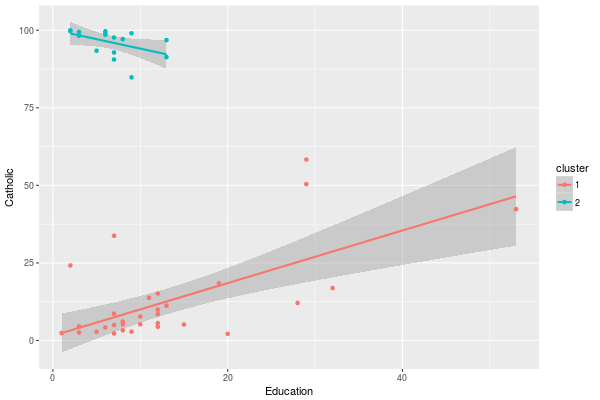

Подсказки:

- для визуализации линейной регрессии пользуйтесь geom_smooth();

- точки проще всего добавить с помощью geom_point().

In [88]:
# сначала создайте переменную cluster в данных swiss
library("ggplot2")

dist_matrix <- dist(swiss) # расчет матрицы расстояний
fit <- hclust(dist_matrix) # иерархическая кластеризация 
swiss$cluster <- as.factor(cutree(fit, 2)) # номер кластера для каждого наблюдения

# строим график
my_plot <- ggplot(swiss, aes(Education, Catholic, col = cluster)) +      
  geom_point() +      
  geom_smooth(method = 'lm')

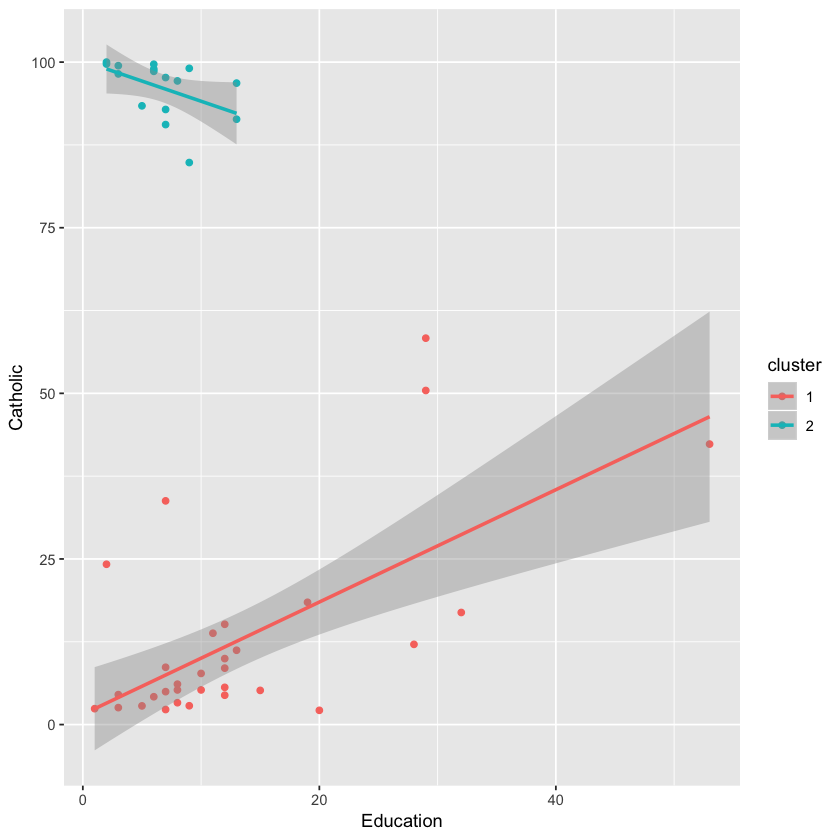

In [89]:
my_plot 